In [ ]:
from google.colab import drive
drive.mount('/content/drive')

!unzip "/content/drive/My Drive/AML-Project/Fam2a.zip"
!unzip "/content/drive/My Drive/AML-Project/portraitCrop.zip"

In [ ]:
key = open("list_attr_portraits.txt")
key.readline()
genresList = key.readline()
print(genresList)
genresList = genresList.split()
from PIL import Image

if not os.path.exists("FID"):
    os.makedirs("FID")


for i in genresList:
  if not os.path.exists("FID/" + i):
    os.makedirs("FID/" + i)

Lines = key.readlines() 
  
count = 0
# Strips the newline character 
for line in Lines: 
  lineData = line.split()
  genreKey = lineData[1:]
  # if count == 0:
  if "1" in genreKey:
    genre = genresList[genreKey.index("1")]
    im = Image.open("content/facecrop/facemoved" + lineData[0])
    im.save("FID/" + genre + "/" + lineData[0])
  count= count +1
  print(count)


In [ ]:
# Moving the images to one file for StarGan
import random, os, time
from PIL import Image

INPATH = r"portraits/"
OUTPATH = r"moved/"

dx = dy = 256
tilesPerImage = 1
# Random Crop
files = os.listdir(INPATH)
numOfImages = len(files)
print(files)
t = time.time()
for file in files:
  if not '.jpg' in file:
    print(os.path.join(INPATH, file))
    subdir =  file
    subdirPath = os.path.join(INPATH, file) + "/"
    if file != ".DS_Store":
      subdirFiles = os.listdir(subdirPath )
      for imgFile in subdirFiles:
        with Image.open(os.path.join(subdirPath, imgFile)) as im:
          for i in range(1, tilesPerImage+1):
            # print(im.size)
            # # newname = file.replace('.', '_{:03d}.'.format(i))
            # w, h = im.size
            # if w ==256:
            #   x = 0
            # else:
            #   x = random.randint(0, w-dx-1)
            # if h == 256:
            #   y = 0
            # else:
            #   y = random.randint(0, h-dy-1)
            # print("Cropping {}: {},{} -> {},{}".format(file, x,y, x+dx, y+dy))
            im.save(OUTPATH +"/moved" + imgFile)

t = time.time()-t
print("Done {} images in {:.2f}s".format(numOfImages, t))
print("({:.1f} images per second)".format(numOfImages/t))
print("({:.1f} tiles per second)".format(tilesPerImage*numOfImages/t))

In [ ]:
import cv2

In [ ]:
!pip install face-recognition
import face_recognition


(768, 1024, 3)
[(187, 700, 295, 593), (235, 378, 343, 270), (428, 577, 503, 502)]


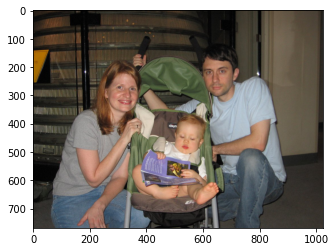

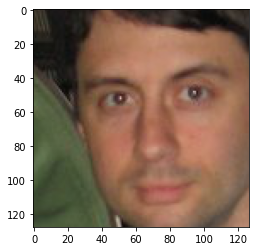

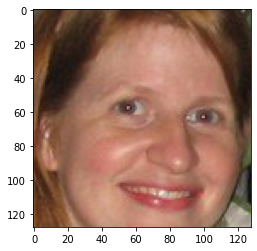

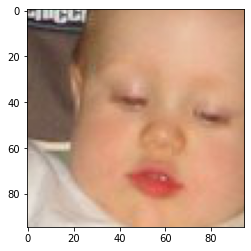

In [ ]:
import face_recognition
import matplotlib.pyplot as plt 

image = face_recognition.load_image_file("/content/Fam2a/1012809184_655c160dbf_1287_18962472@N00.jpg")
print(image.shape)
# face_locations = face_recognition.face_locations(image)
# print(face_locations)
# image.show()
# image = Image.fromarray(image)
# image.show()
faces = face_recognition.face_locations(image)
print(faces)
plt.figure()
plt.imshow(image)
for face in faces:
  top, right, bottom, left = face
  face_image = image[top-20:bottom, left-20:right]
  plt.figure()
  plt.imshow(face_image)

# image = Image.fromarray(image)


In [ ]:
import random, os, time
from PIL import Image

INPATH = r"Fam2a/"
OUTPATH = r"moved/"

# Random Crop
files = os.listdir(INPATH)
numOfImages = len(files)
t = time.time()
foundFace = 0
notFoundFace = 0
for file in files:
      image = face_recognition.load_image_file("moved/" + file)
      faces = face_recognition.face_locations(image)
      if len(faces) > 0:
        print("facefound")
        foundFace = foundFace + 1
      else:
        print("notFoundFace")
        notFoundFace = notFoundFace + 1


Streaming output truncated to the last 5000 lines.
facefound
notFoundFace
notFoundFace
facefound
facefound
facefound
notFoundFace
notFoundFace
notFoundFace
notFoundFace
facefound
notFoundFace
facefound
facefound
facefound
facefound
facefound
facefound
facefound
notFoundFace
notFoundFace
facefound
notFoundFace
notFoundFace
notFoundFace
notFoundFace
facefound
facefound
notFoundFace
notFoundFace
notFoundFace
facefound
facefound
notFoundFace
notFoundFace
facefound
notFoundFace
notFoundFace
notFoundFace
notFoundFace
facefound
facefound
notFoundFace
facefound
facefound
notFoundFace
facefound
notFoundFace
notFoundFace
notFoundFace
facefound
facefound
facefound
facefound
notFoundFace
notFoundFace
facefound
facefound
notFoundFace
facefound
facefound
facefound
facefound
facefound
notFoundFace
notFoundFace
notFoundFace
facefound
notFoundFace
notFoundFace
facefound
facefound
facefound
facefound
facefound
notFoundFace
facefound
facefound
notFoundFace
notFoundFace
facefound
facefound
notFoundFace
fa

In [ ]:
def faceCentricCrop(image,face, cropsize, filename):

  w = image.shape[1]
  h = image.shape[0]

  top, right, bottom, left = face
  center = (int((right + left) / 2), int((top+bottom)/2))
  print(center)
  cropRadius = int(cropsize /2)
  top = center[1] - cropRadius
  bottom = center[1] + cropRadius
  left= center[0] - cropRadius
  right = center[0] + cropRadius

  if left < 0:
    shift = 0 - left
    left = left + shift
    right = right +  shift
  if right > w:
    shift = right - w
    right = right - shift
    left = left -   shift
  if top < 0:
    shift = 0 - top
    top = top + shift
    bottom = bottom +  shift
  if bottom > h:
    shift = bottom - h
    bottom = bottom - shift
    top = top -   shift

  print(top)
  face_image = image[top : bottom, left:right]
  pImage = Image.fromarray(face_image)
  pImage.save("FID/Faces/" + filename)
  return face_image

In [ ]:
import face_recognition
import matplotlib.pyplot as plt 


import random, os, time
from PIL import Image

INPATH = r"Fam2a/"
OUTPATH = r"FID/Faces"

# Random Crop
files = os.listdir(INPATH)
numOfImages = len(files)
t = time.time()
foundFace = 0
notFoundFace = 0
for index, file in enumerate(files):
  if ".jpg" in file:
      image = face_recognition.load_image_file("Fam2a/" + file)
      faces = face_recognition.face_locations(image)
      if len(faces) > 0:
        print("facefound")
        foundFace = foundFace + 1
        for face in faces:
          faceCrop = faceCentricCrop(image,face, 256, file)
      else:
        print("notFoundFace")
        new_width = 256
        new_height = 256
        width = image.shape[1]
        height = image.shape[0]
        left = (width - new_width)/2
        top = (height - new_height)/2
        right = (width + new_width)/2
        bottom = (height + new_height)/2
        # Crop the center of the image
        
        pImage = Image.fromarray(image)
        pImage = pImage.crop((left, top, right, bottom))
        pImage.save("FID/Faces/" + file)
        notFoundFace = notFoundFace + 1
      print(str(index) + " of " + str(numOfImages))











# image = face_recognition.load_image_file("./moved/moved100366.jpg")
# print(image.shape)

# faces = face_recognition.face_locations(image)
# print(faces)
# faceCrop = faceCentricCrop(image,faces[1], 256)
# plt.figure()
# plt.imshow(faceCrop)

Streaming output truncated to the last 5000 lines.
92
(121, 87)
0
42 of 755
facefound
(590, 275)
147
(317, 160)
32
43 of 755
facefound
(330, 210)
82
(657, 347)
219
(547, 375)
247
44 of 755
facefound
(130, 101)
0
(224, 117)
0
45 of 755
facefound
(191, 109)
0
(190, 271)
143
(116, 225)
97
46 of 755
facefound
(461, 131)
3
(646, 169)
41
47 of 755
facefound
(215, 364)
236
(396, 500)
372
(508, 259)
131
48 of 755
facefound
(399, 210)
82
(614, 175)
47
49 of 755
facefound
(311, 273)
145
(610, 352)
224
50 of 755
facefound
(684, 160)
32
(616, 248)
120
51 of 755
facefound
(209, 279)
151
(375, 834)
706
(399, 175)
47
52 of 755
facefound
(216, 233)
105
(531, 167)
39
53 of 755
facefound
(174, 375)
244
(217, 146)
18
(289, 260)
132
54 of 755
facefound
(560, 270)
142
(429, 284)
156
55 of 755
facefound
(242, 153)
25
(349, 100)
0
(211, 228)
76
56 of 755
facefound
(381, 227)
99
(260, 529)
401
57 of 755
facefound
(443, 157)
29
(635, 217)
89
(307, 424)
296
58 of 755
facefound
(169, 376)
248
(403, 361)
233
(657

In [ ]:
files = os.listdir("facecrop")

In [ ]:
print(len(files))

5050


In [ ]:
# !zip -r /content/portraitCrop.zip /content/facecrop/
!zip -r /content/facesCrop.zip /content/famFaces/


  adding: content/famFaces/ (stored 0%)
  adding: content/famFaces/1401830889_d5f9f53018_1419_68003535@N00.jpg (deflated 1%)
  adding: content/famFaces/1176585561_fd6743e60e_1345_19283506@N00.jpg (deflated 1%)
  adding: content/famFaces/2075458712_fa3a530e0f_2363_23131336@N00.jpg (deflated 1%)
  adding: content/famFaces/2042097567_c7748620f1_2385_49903173@N00.jpg (deflated 2%)
  adding: content/famFaces/1881265586_1df8868953_2098_28941892@N00.jpg (deflated 1%)
  adding: content/famFaces/2151364276_ea4f7cb4b2_2318_69571905@N00.jpg (deflated 1%)
  adding: content/famFaces/1752991958_14c32da117_2204_38644528@N00.jpg (deflated 1%)
  adding: content/famFaces/1025296488_4712c26a4f_1160_96603368@N00.jpg (deflated 1%)
  adding: content/famFaces/2073166874_0a6df305e4_2257_8413188@N03.jpg (deflated 1%)
  adding: content/famFaces/2107543415_393fe5e5dd_2294_39471939@N00.jpg (deflated 1%)
  adding: content/famFaces/1849979074_8c27b75f3f_2331_10520218@N03.jpg (deflated 2%)
  adding: content/famFaces

In [ ]:
from google.colab import files

files.download('fid.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!zip -r fid.zip FID

Streaming output truncated to the last 5000 lines.
  adding: FID/Romanticism/80014.jpg (deflated 1%)
  adding: FID/Romanticism/33539.jpg (deflated 1%)
  adding: FID/Romanticism/3234.jpg (deflated 2%)
  adding: FID/Romanticism/53653.jpg (deflated 2%)
  adding: FID/Romanticism/54.jpg (deflated 2%)
  adding: FID/Romanticism/67691.jpg (deflated 1%)
  adding: FID/Romanticism/54592.jpg (deflated 1%)
  adding: FID/Romanticism/70155.jpg (deflated 1%)
  adding: FID/Romanticism/70653.jpg (deflated 1%)
  adding: FID/Romanticism/14917.jpg (deflated 1%)
  adding: FID/Romanticism/9873.jpg (deflated 2%)
  adding: FID/Romanticism/22972.jpg (deflated 2%)
  adding: FID/Romanticism/89879.jpg (deflated 1%)
  adding: FID/Romanticism/69507.jpg (deflated 1%)
  adding: FID/Romanticism/51086.jpg (deflated 1%)
  adding: FID/Romanticism/89082.jpg (deflated 1%)
  adding: FID/Romanticism/38547.jpg (deflated 2%)
  adding: FID/Romanticism/76911.jpg (deflated 2%)
  adding: FID/Romanticism/93149.jpg (deflated 1%)
  ad

In [ ]:


sampleLabels = [[0., 1., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 1., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0.],
[1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1.],
        [0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0.],
[0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 1., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0.],
        [1., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0.],
        [0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1.],
[0., 0., 0., 0., 0., 0., 1.],
        [0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 1., 0., 0., 0.]]

attrsList = ["Romanticism", "Expressionism", "Pointillism", "Impressionism", "Post-Impressionism", "Northern_Renaissance", "Faces"]

In [ ]:
for i in sampleLabels:
  print (attrsList[i.index(1)])

Expressionism
Romanticism
Romanticism
Impressionism
Post-Impressionism
Romanticism
Faces
Faces
Post-Impressionism
Expressionism
Romanticism
Romanticism
Romanticism
Post-Impressionism
Romanticism
Faces
Expressionism
Impressionism
Expressionism
Expressionism
Expressionism
Expressionism
Expressionism
Romanticism
Impressionism
Faces
Post-Impressionism
Romanticism
Expressionism
Post-Impressionism
Northern_Renaissance
Romanticism
Expressionism
Northern_Renaissance
Expressionism
Faces
Faces
Expressionism
Post-Impressionism
Impressionism
Expressionism
Faces
Impressionism
Post-Impressionism
Expressionism
Impressionism
Northern_Renaissance
Impressionism
